<img style="float: left; margin: 30px 15px 15px 15px;" src="https://pngimage.net/wp-content/uploads/2018/06/logo-iteso-png-5.png" width="300" height="500" /> 
    
    
### <font color='navy'> Simulación de procesos financieros. 

**Nombres:** Diego Pintor Ochoa, Lyha Espinosa García

**Fecha:** 07 de mayo del 2021.

**Expediente** : if72622, if721861.
**Profesor:** Oscar David Jaramillo Zuluaga.

# Tarea 11: Clase 24

[Liga al repositorio](https://github.com/PintorOD1997/ProyectoConjunto_LEspinosa_DPintor.git)

## Enunciado de tarea 
Realizar la valuación de las opciones barrera para las acciones de Microsoft, siguiendo los siguientes lineamientos:
1. Realizar la valuación para el tipo de opción barrera 'CALL'- down-and-out, usando la suposición de rendimientos normales y usando el método del histograma. Para ambas valuaciones, comparar los resultados de la evaluación obtenida con los resultados obtenidos por la valuación Europea. Como se realizó en clase.
2. Repetir el inciso anterior pero en esta ocasión para el caso de 'PUT'- Up-and-out.

**Nota:** Analice los datos descargados y según el método ya sea `down-and-out` o `Up-and-out` defina un strike price usando la volatility smile vista en la clase de opciones europeas y basado en el spot price y el strike defina una barrera adecuada.

Se habilitará un enlace en canvas para subir un cuaderno de python, con la solución.

**Criterio de revisión.**

> Se te calificará de acuerdo a los resultados finales que reportes, basados en tu análisis.

### Solución Lyha Espinosa

In [1]:
#importar los paquetes que se van a usar
import pandas as pd
import pandas_datareader.data as web
import numpy as np
import datetime
import matplotlib.pyplot as plt
import scipy.stats as st
import seaborn as sns
%matplotlib inline
#algunas opciones para Pandas
pd.set_option('display.notebook_repr_html', True)
pd.set_option('display.max_columns', 6)
pd.set_option('display.max_rows', 10)
pd.set_option('display.width', 78)
pd.set_option('precision', 3)

In [2]:
# Función para descargar precios de cierre ajustados:
def get_adj_closes(tickers, start_date=None, end_date=None):
    # Fecha inicio por defecto (start_date='2010-01-01') y fecha fin por defecto (end_date=today)
    # Descargamos DataFrame con todos los datos
    closes = web.DataReader(name=tickers, data_source='yahoo', start=start_date, end=end_date)
    # Solo necesitamos los precios ajustados en el cierre
    closes = closes['Adj Close']
    # Se ordenan los índices de manera ascendente
    closes.sort_index(inplace=True)
    return closes

####### Calculation of log-returns
def calc_daily_ret(closes):
    return np.log(closes/closes.shift(1)).dropna()

# 1. Opción barrera 'CALL'- down-and-out

In [3]:
closes = get_adj_closes(['MSFT'], '2017-01-01')
closes_micro = closes.loc[:,'MSFT']

<AxesSubplot:xlabel='Date'>

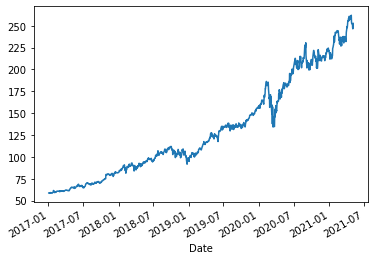

In [4]:
closes_micro.plot()

### Calcular Rendimientos

In [5]:
ret_micro = calc_daily_ret(closes_micro)

### Datos de opciones

In [6]:
micro = web.YahooOptions('MSFT')
micro_opt = micro.get_all_data().reset_index()
micro_opt.set_index('Expiry')

,Strike,Type,Symbol,...,Quote_Time,Last_Trade_Date,JSON
Expiry,,,,,,,
2021-06-18,65.0,call,MSFT210618C00065000,...,2021-05-07 19:56:43,2021-04-30 14:37:48,"{'contractSymbol': 'MSFT210618C00065000', 'str..."
2021-06-18,65.0,put,MSFT210618P00065000,...,2021-05-07 19:56:43,2021-04-30 16:16:58,"{'contractSymbol': 'MSFT210618P00065000', 'str..."
2021-06-18,70.0,call,MSFT210618C00070000,...,2021-05-07 19:56:43,2021-04-30 13:49:44,"{'contractSymbol': 'MSFT210618C00070000', 'str..."
2021-06-18,70.0,put,MSFT210618P00070000,...,2021-05-07 19:56:43,2021-04-23 16:08:57,"{'contractSymbol': 'MSFT210618P00070000', 'str..."
2022-01-21,70.0,call,MSFT220121C00070000,...,2021-05-07 19:56:43,2021-05-05 15:43:59,"{'contractSymbol': 'MSFT220121C00070000', 'str..."
...,...,...,...,...,...,...,...
2023-01-20,390.0,put,MSFT230120P00390000,...,2021-05-07 19:56:45,2021-04-28 14:05:34,"{'contractSymbol': 'MSFT230120P00390000', 'str..."
2023-03-17,390.0,call,MSFT230317C00390000,...,2021-05-07 19:56:45,2021-05-07 18:36:29,"{'contractSymbol': 'MSFT230317C00390000', 'str..."
2023-03-17,390.0,put,MSFT230317P00390000,...,2021-05-07 19:56:45,2021-04-27 19:22:49,"{'contractSymbol': 'MSFT230317P00390000', 'str..."


### Elegir una fecha para seleccionar las opciones de call y encontrar nuestro strike price

La elección de la fecha es debido a que el cliente esta interesado en obtener rentabilidad cada año, para asegurar esto se firman opciones para asegurar que a inicios del 2022 se tenga pactado un precio especifico. 

In [7]:
fecha1 = '2022-01-21'
call_f1 = micro_opt.loc[(micro_opt.Expiry== fecha1) & (micro_opt.Type=='call')]
call_f1

,Strike,Expiry,Type,...,Quote_Time,Last_Trade_Date,JSON
4,70.0,2022-01-21,call,...,2021-05-07 19:56:43,2021-05-05 15:43:59,"{'contractSymbol': 'MSFT220121C00070000', 'str..."
8,75.0,2022-01-21,call,...,2021-05-07 19:56:43,2021-04-28 13:52:19,"{'contractSymbol': 'MSFT220121C00075000', 'str..."
12,80.0,2022-01-21,call,...,2021-05-07 19:56:43,2021-03-26 18:52:06,"{'contractSymbol': 'MSFT220121C00080000', 'str..."
22,85.0,2022-01-21,call,...,2021-05-07 19:56:43,2021-03-25 14:43:22,"{'contractSymbol': 'MSFT220121C00085000', 'str..."
32,90.0,2022-01-21,call,...,2021-05-07 19:56:43,2021-04-07 18:44:56,"{'contractSymbol': 'MSFT220121C00090000', 'str..."
...,...,...,...,...,...,...,...
1794,365.0,2022-01-21,call,...,2021-05-07 19:56:43,2021-05-07 15:28:20,"{'contractSymbol': 'MSFT220121C00365000', 'str..."
1815,370.0,2022-01-21,call,...,2021-05-07 19:56:43,2021-04-30 19:11:50,"{'contractSymbol': 'MSFT220121C00370000', 'str..."
1829,375.0,2022-01-21,call,...,2021-05-07 19:56:43,2021-05-04 15:01:38,"{'contractSymbol': 'MSFT220121C00375000', 'str..."
1847,380.0,2022-01-21,call,...,2021-05-07 19:56:43,2021-05-03 16:36:09,"{'contractSymbol': 'MSFT220121C00380000', 'str..."


### Sonrisa de volatilidad

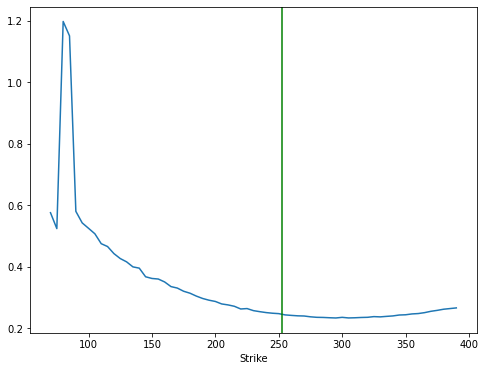

In [8]:
ax = call_f1.set_index('Strike').loc[:, 'IV'].plot(figsize=(8,6))
ax.axvline(call_f1.Underlying_Price.iloc[0], color='g');

Al graficar las opciones call que vencen en la fecha deseada nos damos cuenta que el strike optimo según la sonrisa de volatilidad que se crea en la gráfica es de aproximadamente 255  

#### Opción que deseamos valuar  
Se elige una opción tipo call debido a que queremos comprar en la fecha determinada al precio de ejercicio determinado, dado que microsoft va a la laza se desea pactar un precio para cubrirnos en caso de que suba demasiado su precio. Se desea asegurar un precio de compra.


In [9]:
K = 255
opt_deseada = micro_opt.loc[(micro_opt.Type=='call') & (micro_opt.Strike==K) & (micro_opt.Expiry=='2022-01-21')]
opt_deseada

,Strike,Expiry,Type,...,Quote_Time,Last_Trade_Date,JSON
1092,255.0,2022-01-21,call,...,2021-05-07 19:56:43,2021-05-07 19:37:12,"{'contractSymbol': 'MSFT220121C00255000', 'str..."


In [10]:
opt_valuar = opt_deseada.loc[list(opt_deseada.index)[0]]

In [11]:
# información de la opción
opt_valuar['JSON']

{'contractSymbol': 'MSFT220121C00255000',
 'strike': 255.0,
 'currency': 'USD',
 'lastPrice': 19.5,
 'change': 2.3999996,
 'percentChange': 14.035086,
 'volume': 45,
 'openInterest': 9457,
 'bid': 19.2,
 'ask': 19.55,
 'contractSize': 'REGULAR',
 'expiration': 1642723200,
 'lastTradeDate': 1620416232,
 'impliedVolatility': 0.24265283721923825,
 'inTheMoney': False}

## Simulación de precios
### Modelo Normal de rendimientos

In [12]:
mu = ret_micro.mean()
sigma = ret_micro.std()
r = 0.0006/360
mu, sigma, r

(0.0013378250078103693, 0.017973464521367333, 1.6666666666666665e-06)

In [13]:
from datetime import date

# Datos de la opción y del día de actual
today = pd.Timestamp(date.today())
expiry = opt_valuar.Expiry

# Fechas desde el día de hoy hasta la fecha de cierre del contrato (considerando unicamente los días hábiles)
dates = pd.date_range(start=today, end=expiry, freq='B')

# Cantidad de escenarios a simular para el método de montecarlo
ndays = len(dates)
nscen = 10000

K = opt_valuar.Strike
S0 = closes_micro.iloc[-1]
sim_ret = pd.DataFrame(sigma*np.random.randn(ndays,nscen)+r,index=dates)
sim_closes = S0*np.exp(sim_ret.cumsum())

### Valuación de la opción basandonos en la función de pago correspondiente EUROPEA

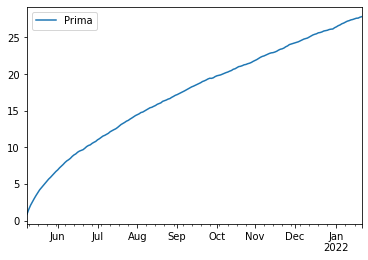

In [14]:
strike = K
call=pd.DataFrame({'Prima':np.exp(-r*ndays)*np.fmax(sim_closes - strike, 0).mean(axis=1)}, index=dates)
call.plot();

In [15]:
# INTERVALOS DE CONFIANZA
confianza = 0.95
sigma_est = sim_closes.iloc[-1].sem()
mean_est = call.iloc[-1].Prima
# i1 = st.t.interval(confianza,nscen-1, loc=mean_est, scale=sigma_est)
i2 = st.norm.interval(confianza, loc=mean_est, scale=sigma_est)
call.iloc[-1], print(i2)

(26.56669301327338, 29.11238296014053)


(Prima    27.84
 Name: 2022-01-21 00:00:00, dtype: float64,
 None)

### Histograma de rendimietos

In [16]:
# Centro mis datos en mi tasa libre de riesgo
freq, values = np.histogram(ret_micro-mu+r, bins=10000)
# freq = freq.astype('float32')
prob = freq/np.sum(freq)

# Datos de la opción y del día de actual
today = pd.Timestamp(date.today())
expiry = opt_valuar.Expiry

# Fechas desde el día de hoy hasta la fecha de cierre del contrato (considerando unicamente los días hábiles)
dates = pd.date_range(start=today, end=expiry, freq='B')

# Cantidad de escenarios a simular para el método de montecarlo
ndays = len(dates)
nscen = 10000

K = opt_valuar.Strike
S0 = closes_micro.iloc[-1]

ret = np.random.choice(values[1:], (ndays,nscen), p=prob)
sim_ret_hist = pd.DataFrame(ret, index=dates)
sim_closes_hist = S0*np.exp(sim_ret_hist.cumsum())

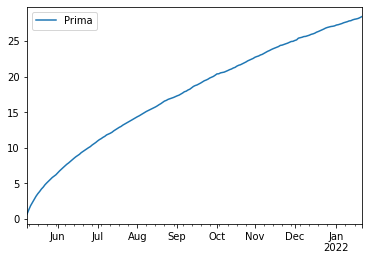

In [17]:
strike = pd.DataFrame(K*np.ones([ndays,nscen]),index=dates)
call_hist=pd.DataFrame({'Prima':np.exp(-r*ndays)*np.fmax(sim_closes_hist-strike,np.zeros([ndays,nscen])).T.mean()},index=dates)
call_hist.plot();

In [18]:
confianza = 0.95
sigma_est = sim_closes_hist.iloc[-1].sem()
mean_est = call_hist.iloc[-1].Prima
# i1 = st.t.interval(confianza,nscen-1, loc=mean_est, scale=sigma_est)
i2 = st.norm.interval(confianza, loc=mean_est, scale=sigma_est)
call_hist.iloc[-1], print(i2)

(27.15057879756702, 29.68127845588267)


(Prima    28.416
 Name: 2022-01-21 00:00:00, dtype: float64,
 None)

In [19]:
opt_valuar['JSON']['lastPrice']

19.5

## Valuación opcion down-and-out
### Modelos normal de rendimietos

In [20]:
mu = ret_micro.mean()
sigma = ret_micro.std()
r = 0.0006/360
mu, sigma, r

(0.0013378250078103693, 0.017973464521367333, 1.6666666666666665e-06)

In [21]:
# Datos de la opción y del día de actual
today = pd.Timestamp(date.today())
expiry = opt_valuar.Expiry

# Fechas desde el día de hoy hasta la fecha de cierre del contrato (considerando unicamente los días hábiles)
dates = pd.date_range(start = today, end = expiry, freq='B')

# Cantidad de escenarios a simular para el método de montecarlo
ndays = len(dates)
nscen = 10000

K = opt_valuar.Strike
S0 = closes_micro.iloc[-1]

sim_ret = pd.DataFrame(sigma*np.random.randn(ndays,nscen)+r,index=dates)
sim_closes = S0*np.exp(sim_ret.cumsum())
S0

252.6300048828125

Se elige esta barrera porque de esta manera se le brinda un mayor control al cliente sobre las pérdidas potenciales en las que podría incurrir después. El precio de la barrera se fija en 225 (por debajo del strike price) dado que analizando el comportamineto de la acción en el mercado las probabilidades de que toque la barrera no son muy altas. Al usar una barrera abaratamos el precio de la prima de la opción

In [22]:
pd.set_option('display.max_columns', 15)

# Precio barrera
B = 225

# Función de desactivación (knock-out) DOWN AND OUT
# Si en algún momento el precio toca la barrera la opción se desactiva
I = (sim_closes > B).cumprod(axis=0)  > 0
I

,0,1,2,3,4,5,6,...,9993,9994,9995,9996,9997,9998,9999
2021-05-07,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True
2021-05-10,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True
2021-05-11,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True
2021-05-12,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True
2021-05-13,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-01-17,True,False,True,True,True,False,False,...,True,False,True,True,False,True,False
2022-01-18,True,False,True,True,True,False,False,...,True,False,True,True,False,True,False
2022-01-19,True,False,True,True,True,False,False,...,True,False,True,True,False,True,False
2022-01-20,True,False,True,True,True,False,False,...,True,False,True,True,False,True,False


### Valuación call down and out

In [23]:
K = opt_valuar.Strike
S0 = opt_valuar.Underlying_Price
K, S0

(255.0, 252.64)

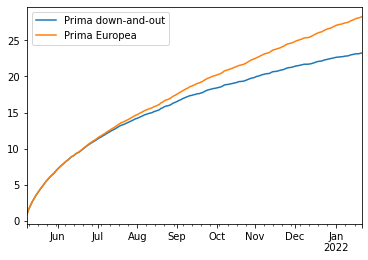

In [24]:
# Definir barrera
B = 225
# Crear función indicadora
I = (sim_closes > B).cumprod(axis=0) > 0
# Definir strike
strike = K
# Calcular la prima de una opción Europea
call = pd.DataFrame({'Prima Europea':np.exp(-r*ndays)*np.fmax(sim_closes - strike, 0)
                     .mean(axis=1)},index=dates)
# Calcular la prima de una opción barrera
calldo = pd.DataFrame({'Prima down-and-out':np.exp(-r*ndays)*(I * np.fmax(sim_closes - strike, 0))
                       .mean(axis=1)},index=dates)
# Graficar el resultado de las dos primas previamente valuadas
ax = calldo.plot();
call.plot(ax=ax);

In [25]:
call.iloc[-1], calldo.iloc[-1]

(Prima Europea    28.287
 Name: 2022-01-21 00:00:00, dtype: float64,
 Prima down-and-out    23.248
 Name: 2022-01-21 00:00:00, dtype: float64)

### Histograma

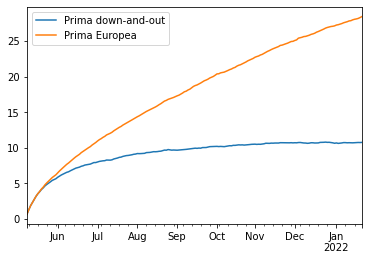

In [26]:

# Definir barrera
B = 225
# Crear función indicadora
I = (sim_closes > B).cumprod(axis=0) > 0
# Definir strike
strike = K
# Calcular la prima de una opción Europea
call_hist = pd.DataFrame({'Prima Europea':np.exp(-r*ndays)*np.fmax(sim_closes_hist - strike, 0)
                     .mean(axis=1)},index=dates)
# Calcular la prima de una opción barrera
call_hist_do = pd.DataFrame({'Prima down-and-out':np.exp(-r*ndays)*(I * np.fmax(sim_closes_hist - strike, 0))
                       .mean(axis=1)},index=dates)
# Graficar el resultado de las dos primas previamente valuadas
ax = call_hist_do.plot();
call_hist.plot(ax=ax);

In [27]:
call_hist.iloc[-1], call_hist_do.iloc[-1]

(Prima Europea    28.416
 Name: 2022-01-21 00:00:00, dtype: float64,
 Prima down-and-out    10.742
 Name: 2022-01-21 00:00:00, dtype: float64)

Podemos observar que la prima de la opción se abarata al poner una barrera, si bien no es mucha diferencia de precios pero si es una diferencia significativa. Al comprador le beneficia usar una opción barrera, ya que las porbabilidades de que la opción se desactive no son altas y el precio de la prima de la opción es menor que el de una opción europea. 
Con el método del histograma la prima se abarata mucho más que si usamos rendimientos normales. 

# 2. Opción barrera 'PUT'- Up-and-out 
### Elegir una fecha para seleccionar las opciones de y encontrar nuestro strike price

La elección de la fecha es debido a que el cliente esta interesado en obtener rentabilidad cada año, para asegurar esto se firman opciones para asegurar que a inicios del 2022 se tenga pactado un precio de venta especifico. 

In [28]:
fecha1 = '2022-01-21'
put_f1 = micro_opt.loc[(micro_opt.Expiry== fecha1) & (micro_opt.Type=='put')]
put_f1

,Strike,Expiry,Type,Symbol,Last,Bid,Ask,...,Root,IsNonstandard,Underlying,Underlying_Price,Quote_Time,Last_Trade_Date,JSON
5,70.0,2022-01-21,put,MSFT220121P00070000,0.18,0.12,0.18,...,MSFT,False,MSFT,252.64,2021-05-07 19:56:43,2021-05-06 18:49:14,"{'contractSymbol': 'MSFT220121P00070000', 'str..."
9,75.0,2022-01-21,put,MSFT220121P00075000,0.25,0.15,0.20,...,MSFT,False,MSFT,252.64,2021-05-07 19:56:43,2021-05-04 15:55:35,"{'contractSymbol': 'MSFT220121P00075000', 'str..."
13,80.0,2022-01-21,put,MSFT220121P00080000,0.39,0.22,0.27,...,MSFT,False,MSFT,252.64,2021-05-07 19:56:43,2021-04-22 15:09:27,"{'contractSymbol': 'MSFT220121P00080000', 'str..."
23,85.0,2022-01-21,put,MSFT220121P00085000,0.35,0.25,0.31,...,MSFT,False,MSFT,252.64,2021-05-07 19:56:43,2021-05-04 18:46:11,"{'contractSymbol': 'MSFT220121P00085000', 'str..."
33,90.0,2022-01-21,put,MSFT220121P00090000,0.35,0.28,0.36,...,MSFT,False,MSFT,252.64,2021-05-07 19:56:43,2021-05-07 18:26:11,"{'contractSymbol': 'MSFT220121P00090000', 'str..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1712,345.0,2022-01-21,put,MSFT220121P00345000,89.65,94.00,94.60,...,MSFT,False,MSFT,252.64,2021-05-07 19:56:43,2021-04-20 19:18:14,"{'contractSymbol': 'MSFT220121P00345000', 'str..."
1736,350.0,2022-01-21,put,MSFT220121P00350000,92.75,98.80,99.10,...,MSFT,False,MSFT,252.64,2021-05-07 19:56:43,2021-04-21 19:34:04,"{'contractSymbol': 'MSFT220121P00350000', 'str..."
1779,360.0,2022-01-21,put,MSFT220121P00360000,104.05,108.55,109.25,...,MSFT,False,MSFT,252.64,2021-05-07 19:56:43,2021-04-20 19:18:54,"{'contractSymbol': 'MSFT220121P00360000', 'str..."
1795,365.0,2022-01-21,put,MSFT220121P00365000,112.40,113.35,114.00,...,MSFT,False,MSFT,252.64,2021-05-07 19:56:43,2021-04-28 15:09:41,"{'contractSymbol': 'MSFT220121P00365000', 'str..."


### Sonrisa de volatilidad

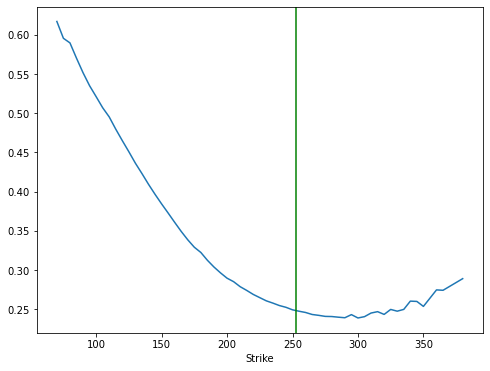

In [29]:
ax = put_f1.set_index('Strike').loc[:, 'IV'].plot(figsize=(8,6))
ax.axvline(put_f1.Underlying_Price.iloc[0], color='g');

Al graficar las opciones call que vencen en la fecha deseada nos damos cuenta que el strike optimo según la sonrisa de volatilidad que se crea en la gráfica es de aproximadamente 250

### Opción que deseamos valuar
Se elige una opción tipo put debido a que queremos vender en la fecha determinada al precio de ejercicio determinado, microsoft va a alza pero se desea pactar un precio para cubrirnos en caso de que baje demasiado su precio. Se desea asegurar un precio de venta.



In [30]:
K = 250
opt_deseada = micro_opt.loc[(micro_opt.Type=='put') & (micro_opt.Strike==K) & (micro_opt.Expiry=='2022-01-21')]
opt_deseada

,Strike,Expiry,Type,Symbol,Last,Bid,Ask,...,Root,IsNonstandard,Underlying,Underlying_Price,Quote_Time,Last_Trade_Date,JSON
1045,250.0,2022-01-21,put,MSFT220121P00250000,19.78,19.45,19.75,...,MSFT,False,MSFT,252.64,2021-05-07 19:56:43,2021-05-07 18:45:38,"{'contractSymbol': 'MSFT220121P00250000', 'str..."


In [31]:
opt_valuar_p = opt_deseada.loc[list(opt_deseada.index)[0]]

In [32]:
# información de la opción
opt_valuar_p['JSON']

{'contractSymbol': 'MSFT220121P00250000',
 'strike': 250.0,
 'currency': 'USD',
 'lastPrice': 19.78,
 'change': -2.9099998,
 'percentChange': -12.825033,
 'volume': 248,
 'openInterest': 5460,
 'bid': 19.45,
 'ask': 19.75,
 'contractSize': 'REGULAR',
 'expiration': 1642723200,
 'lastTradeDate': 1620413138,
 'impliedVolatility': 0.2492445681762695,
 'inTheMoney': False}

### Simulación de precios
#### Modelo normal de rendimientos

In [33]:
from datetime import date

# Datos de la opción y del día de actual
today = pd.Timestamp(date.today())
expiry = opt_valuar_p.Expiry

# Fechas desde el día de hoy hasta la fecha de cierre del contrato (considerando unicamente los días hábiles)
dates = pd.date_range(start=today, end=expiry, freq='B')

# Cantidad de escenarios a simular para el método de montecarlo
ndays = len(dates)
nscen = 10000

K = opt_valuar_p.Strike
S0 = closes_micro.iloc[-1]
sim_ret = pd.DataFrame(sigma*np.random.randn(ndays,nscen)+r,index=dates)
sim_closes = S0*np.exp(sim_ret.cumsum())

#### Valuación de la opción basandonos en la función de pago correspondiente EUROPEA

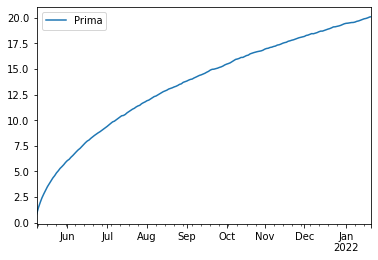

In [34]:
strike = K
put=pd.DataFrame({'Prima':np.exp(-r*ndays)*np.fmax(strike - sim_closes , 0).mean(axis=1)}, index=dates)
put.plot();

In [35]:
put.iloc[-1]

Prima    20.097
Name: 2022-01-21 00:00:00, dtype: float64

In [36]:
# INTERVALOS DE CONFIANZA
confianza = 0.95
sigma_est = sim_closes.iloc[-1].sem()
mean_est = put.iloc[-1].Prima
# i1 = st.t.interval(confianza,nscen-1, loc=mean_est, scale=sigma_est)
i2 = st.norm.interval(confianza, loc=mean_est, scale=sigma_est)
print(i2)

(18.830593302908813, 21.364157809671436)


### Histograma de rendimientos

In [37]:
# Centro mis datos en mi tasa libre de riesgo
freq, values = np.histogram(ret_micro-mu+r, bins=10000)
# freq = freq.astype('float32')
prob = freq/np.sum(freq)

# Datos de la opción y del día de actual
today = pd.Timestamp(date.today())
expiry = opt_valuar_p.Expiry

# Fechas desde el día de hoy hasta la fecha de cierre del contrato (considerando unicamente los días hábiles)
dates = pd.date_range(start=today, end=expiry, freq='B')

# Cantidad de escenarios a simular para el método de montecarlo
ndays = len(dates)
nscen = 10000

K = opt_valuar_p.Strike
S0 = closes_micro.iloc[-1]

ret = np.random.choice(values[1:], (ndays,nscen), p=prob)
sim_ret_hist = pd.DataFrame(ret, index=dates)
sim_closes_hist = S0*np.exp(sim_ret_hist.cumsum())
strike = pd.DataFrame(K*np.ones([ndays,nscen]),index=dates)

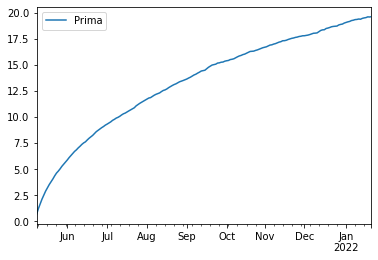

In [38]:
put_hist=pd.DataFrame({'Prima':np.exp(-r*ndays)*np.fmax(strike - sim_closes_hist,np.zeros([ndays,nscen])).T.mean()},index=dates)
put_hist.plot();

In [39]:
put_hist.iloc[-1]

Prima    19.616
Name: 2022-01-21 00:00:00, dtype: float64

In [40]:
confianza = 0.95
sigma_est = sim_closes_hist.iloc[-1].sem()
mean_est = put_hist.iloc[-1].Prima
# i1 = st.t.interval(confianza,nscen-1, loc=mean_est, scale=sigma_est)
i2 = st.norm.interval(confianza, loc=mean_est, scale=sigma_est)
print(i2)

(18.338082915460582, 20.893361468126237)


In [41]:
opt_valuar_p['JSON']['lastPrice']

19.78

### Valuación opcion up-and-out
#### Modelos normal de rendimietos


In [42]:
mu = ret_micro.mean()
sigma = ret_micro.std()
r = 0.0006/360
mu, sigma, r

(0.0013378250078103693, 0.017973464521367333, 1.6666666666666665e-06)

In [43]:
# Datos de la opción y del día de actual
today = pd.Timestamp(date.today())
expiry = opt_valuar_p.Expiry

# Fechas desde el día de hoy hasta la fecha de cierre del contrato (considerando unicamente los días hábiles)
dates = pd.date_range(start = today, end = expiry, freq='B')

# Cantidad de escenarios a simular para el método de montecarlo
ndays = len(dates)
nscen = 10000

K = opt_valuar_p.Strike
S0 = closes_micro.iloc[-1]

sim_ret = pd.DataFrame(sigma*np.random.randn(ndays,nscen)+r,index=dates)
sim_closes = S0*np.exp(sim_ret.cumsum())
S0

252.6300048828125

In [44]:
opt_valuar_p.Underlying_Price

252.64

 El precio de la barrera se fija en 280 (arriba del strike price) dado que analizando el comportamineto de la acción en el mercado las probabilidades de que toque la barrera no son muy altas, ya que el precio si bien va a la alza no presenta subidas muy abruptas. Al usar una barrera abaratamos el precio de la prima de la opción. 

In [45]:
pd.set_option('display.max_columns', 15)

# Precio barrera
B = 280

# Función de desactivación (knock-out) UP AND OUT
# Si en algún momento el precio toca la barrera la opción se desactiva
I = (sim_closes < B).cumprod(axis=0)  > 0
I

,0,1,2,3,4,5,6,...,9993,9994,9995,9996,9997,9998,9999
2021-05-07,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True
2021-05-10,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True
2021-05-11,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True
2021-05-12,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True
2021-05-13,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-01-17,True,True,True,False,False,True,True,...,False,False,False,True,True,True,True
2022-01-18,True,True,True,False,False,True,True,...,False,False,False,True,True,True,True
2022-01-19,True,True,True,False,False,True,True,...,False,False,False,True,True,True,True
2022-01-20,True,True,True,False,False,True,True,...,False,False,False,True,True,True,True


In [46]:
K = opt_valuar_p.Strike
S0 = opt_valuar_p.Underlying_Price
K, S0

(250.0, 252.64)

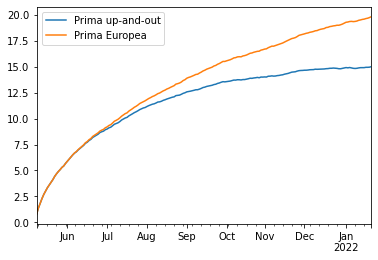

In [47]:
# Definir barrera
B = 280
# Crear función indicadora
I = (sim_closes < B).cumprod(axis=0) > 0
# Definir strike
strike = K
# Calcular la prima de una opción Europea
put = pd.DataFrame({'Prima Europea':np.exp(-r*ndays)*np.fmax(strike - sim_closes , 0)
                     .mean(axis=1)},index=dates)
# Calcular la prima de una opción barrera
put_uo = pd.DataFrame({'Prima up-and-out':np.exp(-r*ndays)*(I * np.fmax(strike - sim_closes, 0))
                       .mean(axis=1)},index=dates)
# Graficar el resultado de las dos primas previamente valuadas
ax = put_uo.plot();
put.plot(ax=ax);

In [48]:
put.iloc[-1], put_uo.iloc[-1]

(Prima Europea    19.828
 Name: 2022-01-21 00:00:00, dtype: float64,
 Prima up-and-out    15.012
 Name: 2022-01-21 00:00:00, dtype: float64)

### Histograma

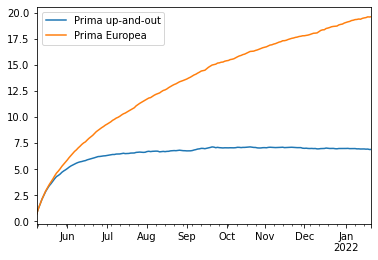

In [49]:

# Definir barrera
B = 280
# Crear función indicadora
I = (sim_closes < B).cumprod(axis=0) > 0
# Definir strike
strike = K
# Calcular la prima de una opción Europea
put_hist = pd.DataFrame({'Prima Europea':np.exp(-r*ndays)*np.fmax(strike - sim_closes_hist , 0)
                     .mean(axis=1)},index=dates)
# Calcular la prima de una opción barrera
put_hist_uo = pd.DataFrame({'Prima up-and-out':np.exp(-r*ndays)*(I * np.fmax(strike - sim_closes_hist, 0))
                       .mean(axis=1)},index=dates)
# Graficar el resultado de las dos primas previamente valuadas
ax = put_hist_uo.plot();
put_hist.plot(ax=ax);

In [50]:
put_hist.iloc[-1], put_hist_uo.iloc[-1]

(Prima Europea    19.616
 Name: 2022-01-21 00:00:00, dtype: float64,
 Prima up-and-out    6.886
 Name: 2022-01-21 00:00:00, dtype: float64)

Finalmente podemos analizar que la barrera si logra abaratar el precio de la prima de la opción de manera significativa. Se observa claramente que con el método del histograma la prima se abarata mucho más que si usamos rendimientos normales. 

### Solución Diego Pintor